In [2]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt

In [2]:
n=100
beta_0 = 5
beta_1 = 2
np.random.seed(1)
x = 10*ss.uniform.rvs(size=n)
y = beta_0 + beta_1 * x + ss.norm.rvs(loc=0, scale=1, size=n) #ss.norm.rvs -> generate variable with mean = 0, size match x

Text(0, 0.5, 'Y')

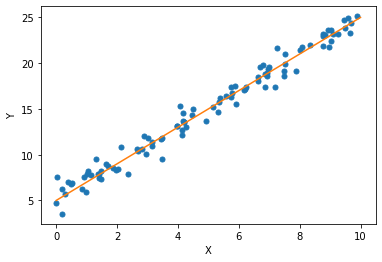

In [3]:
plt.figure()
plt.plot(x,y, "o", ms=5) #ms means marker size, 'o' circle to plot
xx = np.array([0,10])
plt.plot(xx, beta_0 + beta_1 * xx)
plt.xlabel("X")
plt.ylabel("Y")

In [5]:
np.mean(x)

4.8587792760014565

In [6]:
np.mean(y)

14.80142786070299

In [8]:
def compute_rss(y_estimate, y):
  return sum(np.power(y-y_estimate, 2))
def estimate_y(x, b_0, b_1):
  return b_0 + b_1 * x
rss = compute_rss(estimate_y(x, beta_0, beta_1), y)

In [9]:
print(rss)

81.540007425512


In [15]:
rss = []
slopes = np.arange(-10,15,0.001)
for slope in slopes:
    rss.append(np.sum((y - beta_0 - slope*x)**2)) #compute the deviation and add sum of the estimated slope values
print(rss)

[465163.6265980302, 465086.1430283995, 465008.6659137614, 464931.1952541162, 464853.73104946373, 464776.273299804, 464698.82200513716, 464621.37716546294, 464543.9387807815, 464466.5068510928, 464389.08137639693, 464311.6623566938, 464234.2497919835, 464156.8436822659, 464079.44402754103, 464002.05082780897, 463924.6640830696, 463847.2837933231, 463769.9099585693, 463692.5425788083, 463615.18165404, 463537.82718426455, 463460.47916948184, 463383.1376096919, 463305.80250489456, 463228.4738550901, 463151.1516602785, 463073.83592045953, 462996.5266356335, 462919.2238058001, 462841.92743095936, 462764.6375111115, 462687.3540462564, 462610.0770363941, 462532.80648152455, 462455.54238164774, 462378.28473676357, 462301.0335468723, 462223.7888119739, 462146.5505320681, 462069.31870715506, 461992.0933372348, 461914.8744223074, 461837.66196237254, 461760.45595743065, 461683.2564074815, 461606.06331252505, 461528.8766725614, 461451.69648759044, 461374.52275761246, 461297.35548262706, 461220.19466

In [16]:
ind_min = np.argmin(rss) #find smallest index of estimated slope value list
print(ind_min)

12004


In [17]:
print("Estimate for the slope:", slopes[ind_min]) #find slope that gives smallest RSS value

Estimate for the slope: 2.003999999993347


Text(0, 0.5, 'RSS')

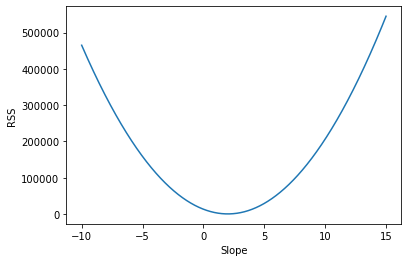

In [18]:
plt.figure()
plt.plot(slopes, rss)
plt.xlabel("Slope")
plt.ylabel("RSS")

In [3]:
n=500
beta_0 = 5
beta_1 =2
beta_2 = -1
np.random.seed(1)
x_1 = 10 * ss.uniform.rvs(size=n)
x_2 = 10 * ss.uniform.rvs(size=n)

y = beta_0 + beta_1 * x_1 + beta_2 * x_2 + ss.norm.rvs(loc=0, scale=1, size=n)


In [4]:
X = np.stack([x_1, x_2], axis=1)

Text(0.5, 0, '$y$')

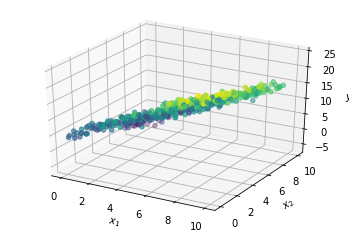

In [5]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111,projection = '3d')
ax.scatter(X[:,0], X[:,1], y, c=y)
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
ax.set_zlabel("$y$")

In [6]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression(fit_intercept=True)
lm.fit(X, y)

LinearRegression()

In [7]:
lm.intercept_

5.154077763777254

In [8]:
lm.coef_[0] #beta_1

1.9999378989891399

In [9]:
lm.coef_[1] #beta_2

-1.020264486993336

In [10]:
X_0 = np.array([2, 4])

In [11]:
lm.predict(X_0.reshape(1,-1))

array([5.07289561])

In [12]:
lm.score(X, y)

0.9798997316600129

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.5, random_state=1)
lm = LinearRegression(fit_intercept=True)
lm.fit(X_train, y_train) #first arg:predictors in training data set, second arg: outcome in training data set 

LinearRegression()

In [14]:
lm.score(X_test, y_test)

0.9794930834681773